In [0]:
ls

combined.csv  sample_data/  source1.png  synth_data.csv


#Read and Plot Data

In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv('synth_data.csv', skiprows=1, sep=',', header=None)
df.columns = ['X1', 'X2', 'X3', 'X4']
df

,X1,X2,X3,X4
0,8.884306,1.869954,-0.234808,10.459627
1,11.325768,-1.090675,0.276436,7.761590
2,5.914430,1.156907,-7.076249,7.295638
3,-2.659059,-1.552651,-5.522654,10.556292
4,-9.549330,-0.841020,-2.686896,11.445329
5,-9.282637,0.652396,3.985963,11.253591
6,-4.240316,-2.072682,5.347273,9.458374
7,2.646278,-0.039387,2.491671,6.400665
8,7.707378,-2.488419,-0.421323,6.707482
9,8.401435,2.129670,-3.490353,5.685633


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


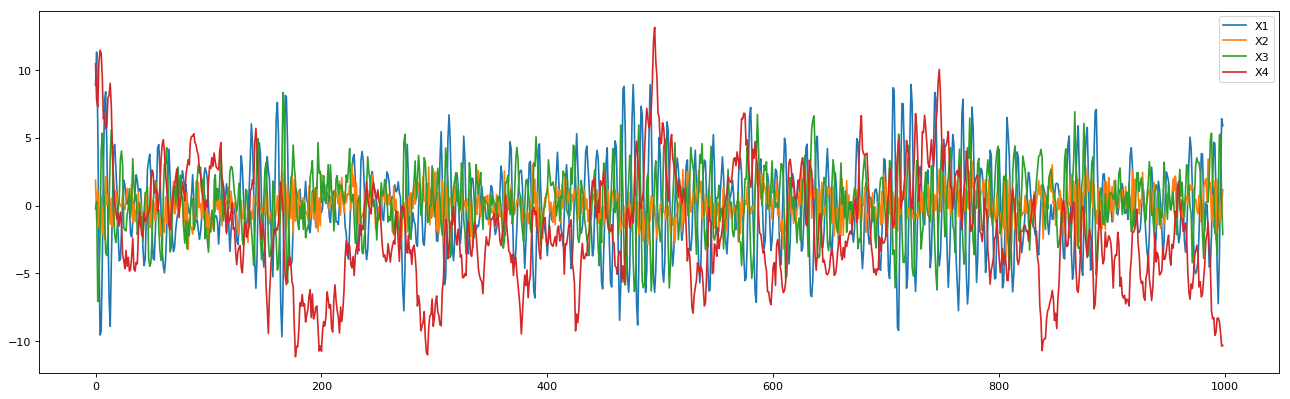

In [0]:
import matplotlib.pyplot as plt
# plot the line
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

fig1 = plt.plot(df[['X1','X2','X3','X4']])
plt.legend(fig1, labels=('X1','X2','X3','X4'), loc='best')

plt.savefig('source1.png', bbox_inches='tight')
plt.show()

#Learn VAR model from the data using library in https://www.statsmodels.org/dev/vector_ar.html

In [0]:
! pip install --upgrade git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-m316lv22
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-m316lv22
  Stored in directory: /tmp/pip-ephem-wheel-cache-z1ayulnv/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

df.columns = ['X1', 'X2', 'X3', 'X4']
#print(df.shape)
df.index = pd.date_range('1979-01-01', periods=999, freq='M')
model = VAR(df)
results=model.fit(5)
results.summary()



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Jun, 2019
Time:                     14:31:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.470779
Nobs:                     994.000    HQIC:                  0.214030
Log likelihood:          -5585.80    FPE:                    1.05820
AIC:                    0.0565472    Det(Omega_mle):        0.973308
--------------------------------------------------------------------
Results for equation X1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.063795         0.035453           -1.799           0.072
L1.X1         1.326693         0.032077           41.360           0.000
L1.X2        -0.009810         0.031019           -0.316           0.752
L1.X3        -0.027506

In [0]:
#Number of estimated parameters, including the intercept / trends
#self.neqs * self.k_ar + self.k_exog
#29 = 4*7+1
print("degree of freedom df_model:", results.df_model)

#Number of observations minus number of estimated parameters
print("degree of freedom df_resid:", results.df_resid)

print("nobs:", results.nobs)

degree of freedom df_model: 21
degree of freedom df_resid: 973
nobs: 994


#Forecasting based on VAR

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

df.columns = ['X1', 'X2', 'X3', 'X4']
df2 = df[:500]
#print(df.shape)
df2.index = pd.date_range('1979-01-01', periods=500, freq='M')
model2 = VAR(df2)
results2 = model2.fit(7)
results2.summary()
foecasted = results2.forecast(df2.values, 50)
foecastedDF = pd.DataFrame(foecasted)
foecastedDF.columns = ['X1', 'X2', 'X3', 'X4']

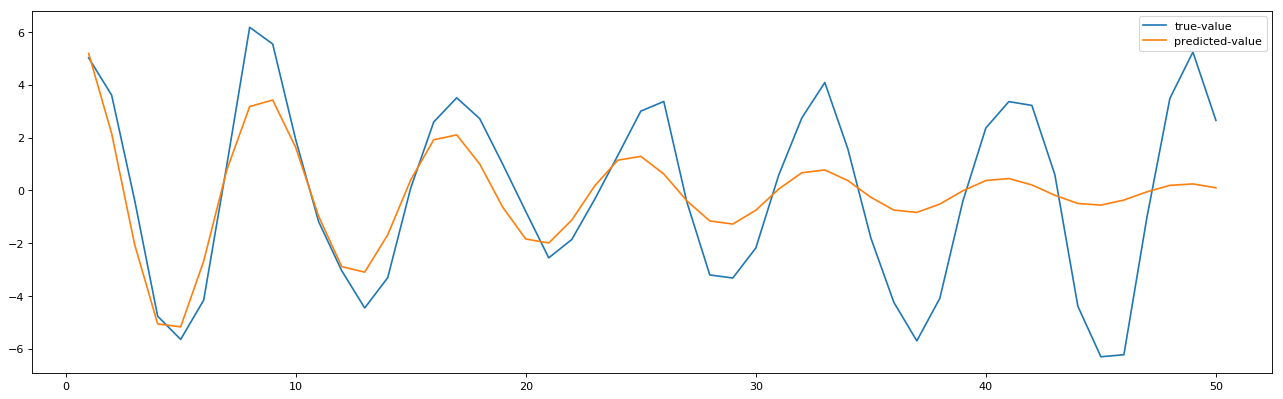

In [0]:
import matplotlib.pyplot as plt
# plot the line
from matplotlib.pyplot import figure

#print(df['X1'].values[500:550])

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
newDF = pd.DataFrame({'x': range(1,51), 'true-value': df['X1'].values[499:549], 'predicted-value': foecastedDF['X1'].values[0:50]})

figX1 = plt.plot('x', 'true-value', data=newDF)
figX2 = plt.plot('x', 'predicted-value', data=newDF)
plt.legend()
plt.savefig('prediction.png', bbox_inches='tight')
plt.show()

In [0]:
lag_order = results.k_ar
print(lag_order)
df.values[-lag_order:]
# df.values[-lag_order:].size

5


array([[ -7.23314996,  -1.53555559,   1.01063489,  -8.29608797],
       [ -3.68116578,   0.82378346,   5.20066557,  -8.56708497],
       [  2.04797648,  -1.1464981 ,   5.27413302,  -9.36700271],
       [  6.41221811,  -0.03064039,   0.35989107, -10.37169368],
       [  5.89864704,   1.1667652 ,  -2.13036371, -10.31975022]])

In [0]:
results.forecast(df.values[-lag_order:], 5)

array([[ 2.16952436,  0.12946436, -3.11802177, -8.80263919],
       [-2.43977944,  0.76281615, -2.02025992, -7.09544231],
       [-5.32451646,  0.06211762,  0.85712823, -5.90078128],
       [-4.95147285,  0.4174026 ,  3.09488776, -5.79449028],
       [-1.88660991,  0.0203882 ,  3.82841725, -6.54618434]])

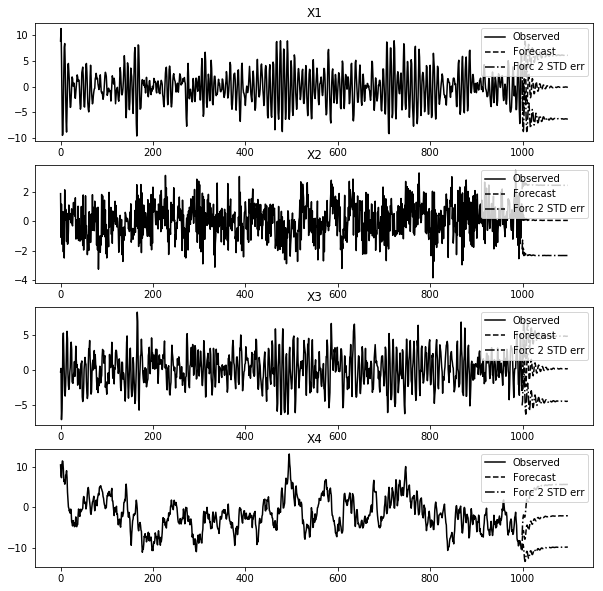

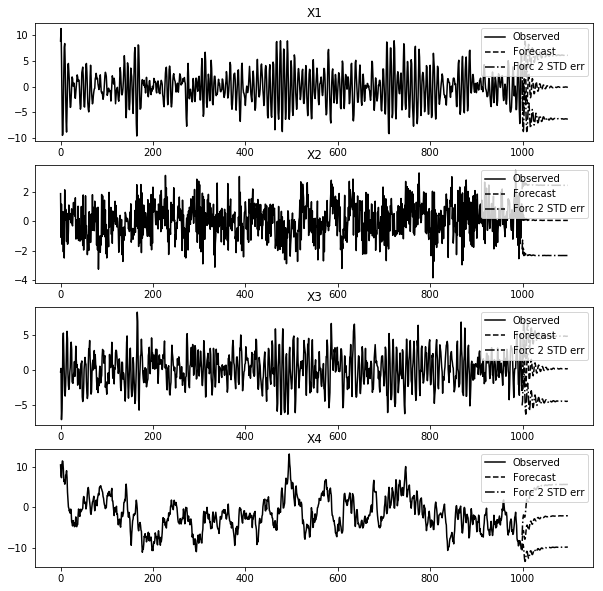

In [0]:
results.plot_forecast(100)

# Test causality using VAR library

In [0]:
# causality = results.test_causality('X1', 'X2', kind='f')
# causality = results.test_causality('X1', 'X4', kind='f')
# causality = results.test_causality('X1', 'X3', kind='f')
# causality = results.test_causality('X3', 'X3', kind='f')
causality = results.test_causality('X4', 'X3', kind='f')
causality = results.test_causality('X2', 'X3', kind='f')
causality = results.test_causality('X3', 'X2', kind='f')
causality = results.test_causality('X4', 'X2', kind='f')
causality = results.test_causality('X4', 'X1', kind='f')

print(causality)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: X1 does not Granger-cause X4: fail to reject at 5% significance level. Test statistic: 1.010, critical value: 2.216>, p-value: 0.410>


In [0]:
causality = results.test_causality('X1', ['X2','X3','X4'], kind='f')
print(causality)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause X1: fail to reject at 5% significance level. Test statistic: 1.002, critical value: 1.669>, p-value: 0.450>


In [0]:
causality = results.test_causality('X4', ['X2'], kind='f')
print(causality)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: X2 does not Granger-cause X4: fail to reject at 5% significance level. Test statistic: 0.924, critical value: 2.216>, p-value: 0.464>


In [0]:
!pip install graphviz
!apt-get install graphviz xdg-utils -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
xdg-utils is already the newest version (1.1.2-1ubuntu2.3).
xdg-utils set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


## Draw Causality Graph of pair-wised results

Check results in 'Results': Checking for X1 can granger cause X1
Check results in 'Reversed_Results': Checking for X1 can granger cause X1
=========-------==========
Check results in 'Results': Checking for X2 can granger cause X1
Check results in 'Reversed_Results': Checking for X1 can granger cause X2
=========-------==========
Check results in 'Results': Checking for X3 can granger cause X1
Check results in 'Reversed_Results': Checking for X1 can granger cause X3

------------------------Results
ssr_ftest
1 Lag rejected H0, with p = 5.606891312793949e-169
5.606891312793949e-169
1
finish saving p and lag as (results df )
5.606891312793949e-169
1

------------------------Reversed_Results
ssr_ftest
1 Lag rejected H0, with p = 2.091536729127969e-226
2.091536729127969e-226
1
finish saving p and lag as (results_re)
2.091536729127969e-226
1

------------------------Reversed_Results
ssr_ftest
2 Lag rejected H0, with p = 7.906735264104708e-174
finish saving p and lag as (results_re)
2.091536

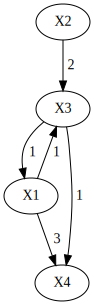

In [0]:
from statsmodels.tsa import stattools
from graphviz import Digraph

g = Digraph('G', filename='granger.gv', strict=True)
edgegranger = []
data = df

def Granger_automated(maxlag):
    temp_p = 1
    temp_p_re = 1
    temp_lag = -1
    temp_lag_re = -1
    firstptr = 0
    end = len(data.columns)
    while firstptr < end:
        secondptr = firstptr
        while secondptr < end:
            # test for B→A, reversed is A→B
            # note: vA = caused = effect
            variableA = data[data.columns[firstptr]].tolist()
            # note: vB = causing = cause
            variableB = data[data.columns[secondptr]].tolist()
            combined_vector = []
            reversed_combined_vector = []
            for i in range(len(variableA)):
                combined_vector.append((variableA[i], variableB[i]))
                reversed_combined_vector.append((variableB[i], variableA[i]))
#             print("Check results in 'Results': Checking for {} -2ndptr- can granger cause {} -1stptr-".format(data.columns[secondptr],data.columns[firstptr]))
            print("Check results in 'Results': Checking for {} can granger cause {}".format(data.columns[secondptr],data.columns[firstptr]))
            results = stattools.grangercausalitytests(combined_vector, maxlag, addconst=True, verbose=False)
#             print("Check results in 'Reversed_Results': Checking for {} -1stptr- can granger cause {} -2ndptr-".format(data.columns[firstptr],data.columns[secondptr]))
            print("Check results in 'Reversed_Results': Checking for {} can granger cause {}".format(data.columns[firstptr],data.columns[secondptr]))
            reversed_results = stattools.grangercausalitytests(reversed_combined_vector, maxlag, addconst=True, verbose=False)
            # count is timelag
            # draw the graph
            for count in range(1,maxlag+1):
                for tupleItems in results[count]:
                    if isinstance(tupleItems, dict):
                        for key, value in tupleItems.items():
                            if key == "ssr_ftest" and value[1] < 1e-10:
                                print("\n------------------------""Results""")
                                print(key)
                                print("{} Lag rejected H0, with p = {}".format(count, value[1]))
                                if value[1] < temp_p:
                                  temp_p = value[1]
                                  print(temp_p)
                                  temp_lag = count
                                  print(temp_lag)
                                g.edge(data.columns[secondptr],data.columns[firstptr],label = " {} ".format(temp_lag))
                                print("finish saving p and lag as (results df )")
                                print(temp_p)
                                print(temp_lag)
                                if firstptr != secondptr:
                                    edgegranger.append((data.columns[secondptr],data.columns[firstptr]))
                
                for tupleItems_re in reversed_results[count]:
                    if isinstance(tupleItems_re, dict):
                        for key_re, value_re in tupleItems_re.items():
                            if key_re == "ssr_ftest" and value_re[1] < 1e-10:
                                print("\n------------------------""Reversed_Results""")
                                print(key_re)
                                print("{} Lag rejected H0, with p = {}".format(count, value_re[1]))
                                if value_re[1] < temp_p_re:
                                  temp_p_re = value_re[1]
                                  print(temp_p_re)
                                  temp_lag_re = count
                                  print(temp_lag_re)
                                print("finish saving p and lag as (results_re)")
                                print(temp_p_re)
                                print(temp_lag_re)
                                g.edge(data.columns[firstptr],data.columns[secondptr],label = " {} ".format(temp_lag_re))
                                if firstptr != secondptr:
                                    edgegranger.append((data.columns[firstptr],data.columns[secondptr]))
            temp_p = 1
            temp_lag = -1
            temp_p_re = 1
            temp_lag_re = -1  
            print("=========-------==========")
            secondptr += 1
        firstptr += 1

Granger_automated(3)
print(g)
print(g.view())
g

## Draw Causality Graph of VAR results

1
Start to test next pair

Check results in 'Results': Checking for X1 can granger cause X1
Check results in 'Results_Reversed': Checking for X1 can granger cause X1
------------------------Results
1 Lag rejected H0, with p = 0.0
lag_dic [1] [X1X1] is 1
temp_lag for X1X1 is 1 
with temp_p as 0.0 

=========-------==========
------------------------Results_Reversed
1 Lag rejected H0, with p = 0.0
lag_dic [1] [X1X1] is 0.0

=========-------==========
Start to test next pair

Check results in 'Results': Checking for X2 can granger cause X1
Check results in 'Results_Reversed': Checking for X1 can granger cause X2
H0 is not rejected in Results, go to test next pair

=========-------==========
H0 is not rejected in Results_Reversed, go to test next pair

=========-------==========
Start to test next pair

Check results in 'Results': Checking for X3 can granger cause X1
Check results in 'Results_Reversed': Checking for X1 can granger cause X3
------------------------Results
1 Lag rejected H0,

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1335: FutureWarning: For consistency with other statmsodels models, starting in version 0.11.0 `VARResults.cov_params` will be a method instead of a property.
  category=FutureWarning)


------------------------Results
4 Lag rejected H0, with p = 3.6525423091707165e-28
lag_dic [4] [X3X3] is 1
temp_p is not updated

=========-------==========
------------------------Results_Reversed
4 Lag rejected H0, with p = 3.6525423091707165e-28
lag_dic [4] [X3X3] is 3.6525423091707165e-28

=========-------==========
Start to test next pair

Check results in 'Results': Checking for X4 can granger cause X3
Check results in 'Results_Reversed': Checking for X3 can granger cause X4
H0 is not rejected in Results, go to test next pair

=========-------==========
------------------------Results_Reversed
4 Lag rejected H0, with p = 3.4627050900408834e-28
lag_dic [4] [X3X4] is 1
temp_p is not updated

=========-------==========
Start to test next pair

Check results in 'Results': Checking for X4 can granger cause X4
Check results in 'Results_Reversed': Checking for X4 can granger cause X4
------------------------Results
4 Lag rejected H0, with p = 0.0
lag_dic [4] [X4X4] is 1
temp_p is not up

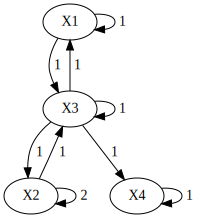

In [0]:
from graphviz import Digraph
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.compat.python import (range, lrange, string_types,
                                       StringIO, iteritems)
from statsmodels.tsa.vector_ar import output, plotting, util
from statsmodels.tsa.tsatools import vec, unvec, duplication_matrix
import scipy.linalg
from statsmodels.tools.tools import chain_dot
import scipy.stats as stats
from statsmodels.tsa.vector_ar.hypothesis_test_results import \
    CausalityTestResults, NormalityTestResults, WhitenessTestResults


def a_test_causality(self, caused, causing=None, kind='f', signif=0.05):
      if not (0 < signif < 1):
          raise ValueError("signif has to be between 0 and 1")

      allowed_types = (string_types, int)

      if isinstance(caused, allowed_types):
          caused = [caused]
      if not all(isinstance(c, allowed_types) for c in caused):
          raise TypeError("caused has to be of type string or int (or a "
                          "sequence of these types).")
      caused = [self.names[c] if type(c) == int else c for c in caused]
      caused_ind = [util.get_index(self.names, c) for c in caused]

      if causing is not None:

          if isinstance(causing, allowed_types):
              causing = [causing]
          if not all(isinstance(c, allowed_types) for c in causing):
              raise TypeError("causing has to be of type string or int (or "
                              "a sequence of these types) or None.")
          causing = [self.names[c] if type(c) == int else c for c in causing]
          causing_ind = [util.get_index(self.names, c) for c in causing]

      if causing is None:
          causing_ind = [i for i in range(self.neqs) if i not in caused_ind]
          causing = [self.names[c] for c in caused_ind]

      k, p = self.neqs, self.k_ar
      # number of restrictions
      num_restr = len(causing) * len(caused) * p
      num_det_terms = self.k_exog

      # Make restriction matrix
      C = np.zeros((num_restr, k * num_det_terms + k**2 * p), dtype=float)
      cols_det = k * num_det_terms
      row = 0
      for j in range(p):
          for ing_ind in causing_ind:
              for ed_ind in caused_ind:
                  C[row, cols_det + ed_ind + k * ing_ind + k**2 * j] = 1
                  row += 1

      # Lutkepohl 3.6.5
      Cb = np.dot(C, vec(self.params.T))
      middle = scipy.linalg.inv(chain_dot(C, self.cov_params, C.T))

      # wald statistic
      lam_wald = statistic = chain_dot(Cb, middle, Cb)

      if kind.lower() == 'wald':
          df = num_restr
          dist = stats.chi2(df)
      elif kind.lower() == 'f':
          statistic = lam_wald / num_restr
          df = (num_restr, k * self.df_resid)
          dist = stats.f(*df)
      else:
          raise Exception('kind %s not recognized' % kind)

      pvalue = dist.sf(statistic)
      crit_value = dist.ppf(1 - signif)

#       print(pvalue)
#       print("---====--")
      return pvalue, CausalityTestResults(causing, caused, statistic,
                                  crit_value, pvalue, df, signif,
                                  test="granger", method=kind)

    
VARResults.test_causality = a_test_causality

g = Digraph('G', filename='granger.gv', strict=True)
edgegranger = []

data = df
model = VAR(data)
lag_dic = {}

def Granger_automated(maxlag):
    # outer loop: different time lags
    for t_lag in range(1,maxlag+1):
        print(t_lag)
        temp_p = 1
        temp_p_re = 1
        temp_lag = -1
        temp_lag_re = -1
        firstptr = 0
        end = len(data.columns)
        # Fit VAR regression under current time lag
        results = model.fit(t_lag)
        while firstptr < end:
            secondptr = firstptr
            while secondptr < end:
                print("Start to test next pair\n")
                # test for B→A, reversed is A→B
                # note: vA = caused = effect
                name_variableA = str(data.columns[firstptr])
                # note: vB = causing = cause
                name_variableB = str(data.columns[secondptr])
                print("Check results in 'Results': Checking for {} can granger cause {}".format(name_variableB,name_variableA))
                causality = results.test_causality(name_variableA, name_variableB, kind='f')
                print("Check results in 'Results_Reversed': Checking for {} can granger cause {}".format(name_variableA,name_variableB))
                causality_re = results.test_causality(name_variableB, name_variableA, kind='f')
                concat_pair_name = str(name_variableB+name_variableA)
#                 print(concat_pair_name)
                concat_pair_name_re = str(name_variableA+name_variableB)
                
                # Causality Test
                if causality[0]<0.001:
                    # Output causality result for this single test
                    print("------------------------""Results""")
                    print("{} Lag rejected H0, with p = {}".format(t_lag, causality[0]))
                    # create lag_dic[t_lag]
                    if t_lag not in lag_dic:
                        lag_dic[t_lag] = {}
#                     print("lag_dic[t_lag] is")
#                     print(lag_dic[t_lag])
                    # save the current output p = causality[0] into the lag_dic[t_lag]
                    if concat_pair_name not in lag_dic[t_lag]:
                        lag_dic[t_lag][concat_pair_name] = 1
                    # temp_p is saved in lag_dic[concat_pair_name]["p"]
                    if concat_pair_name not in lag_dic:
                        lag_dic[concat_pair_name] = {}
                        lag_dic[concat_pair_name]["lag"] = 0
                        lag_dic[concat_pair_name]["p"] = 1
                    print("lag_dic [{}] [{}] is {}".format(t_lag,concat_pair_name,lag_dic[t_lag][concat_pair_name]))
                    if causality[0] < lag_dic[t_lag][concat_pair_name]:
                        # save current p, which is lag_dic[t_lag][concat_pair_name] in this approach
                        lag_dic[t_lag][concat_pair_name] = causality[0] 
                        # save the temp_p as smallest p
                        if lag_dic[t_lag][concat_pair_name] < lag_dic[concat_pair_name]["p"]:
                            lag_dic[concat_pair_name]["p"] = lag_dic[t_lag][concat_pair_name]
                            lag_dic[concat_pair_name]["lag"] = t_lag
#                         print(lag_dic[t_lag][concat_pair_name])
#                         print(lag_dic)
                            print("temp_lag for {} is {} ".format(concat_pair_name, lag_dic[concat_pair_name]["lag"]))
                            print("with temp_p as {} ".format(lag_dic[concat_pair_name]["p"]))
                        else:
                            print("temp_p is not updated")
                    g.edge(name_variableB,name_variableA,label = " {} ".format(lag_dic[concat_pair_name]["lag"]))
                else:
                    print("H0 is not rejected in Results, go to test next pair")
                print("\n=========-------==========")
                
                if causality_re[0]<0.001:
                    print("------------------------""Results_Reversed""")
                    print("{} Lag rejected H0, with p = {}".format(t_lag, causality_re[0]))
                    if t_lag not in lag_dic:
                        lag_dic[t_lag] = {}
                    if concat_pair_name_re not in lag_dic[t_lag]:
                        lag_dic[t_lag][concat_pair_name_re] = 1
                    # temp_p is saved in lag_dic[concat_pair_name_re]["p"]
                    if concat_pair_name_re not in lag_dic:
                        lag_dic[concat_pair_name_re] = {}
                        lag_dic[concat_pair_name_re]["lag"] = 0
                        lag_dic[concat_pair_name_re]["p"] = 1
                    print("lag_dic [{}] [{}] is {}".format(t_lag,concat_pair_name_re,lag_dic[t_lag][concat_pair_name_re]))
  
                    if causality_re[0] < lag_dic[t_lag][concat_pair_name_re]:
                        # save current p, which is lag_dic[t_lag][concat_pair_name_re] in this approach
                        lag_dic[t_lag][concat_pair_name_re] = causality_re[0] 
                        # save the temp_p as smallest p
                        if lag_dic[t_lag][concat_pair_name_re] < lag_dic[concat_pair_name_re]["p"]:
                            lag_dic[concat_pair_name_re]["p"] = lag_dic[t_lag][concat_pair_name_re]
                            lag_dic[concat_pair_name_re]["lag"] = t_lag
                            print("temp_lag for {} is {} ".format(concat_pair_name_re,lag_dic[concat_pair_name_re]["lag"]))
                            print("with temp_p as {} ".format(lag_dic[concat_pair_name_re]["p"]))
                        else:
                            print("temp_p is not updated")
                    g.edge(name_variableA,name_variableB,label = " {} ".format(lag_dic[concat_pair_name_re]["lag"]))
                else:
                    print("H0 is not rejected in Results_Reversed, go to test next pair")
                print("\n=========-------==========")
                
                secondptr += 1
            firstptr += 1
        
        print("********start to test next lag**********")
    t_lag += 1
    
Granger_automated(4)
print(g)
print(g.view())
g